In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def imshow(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    plt.imshow(image)

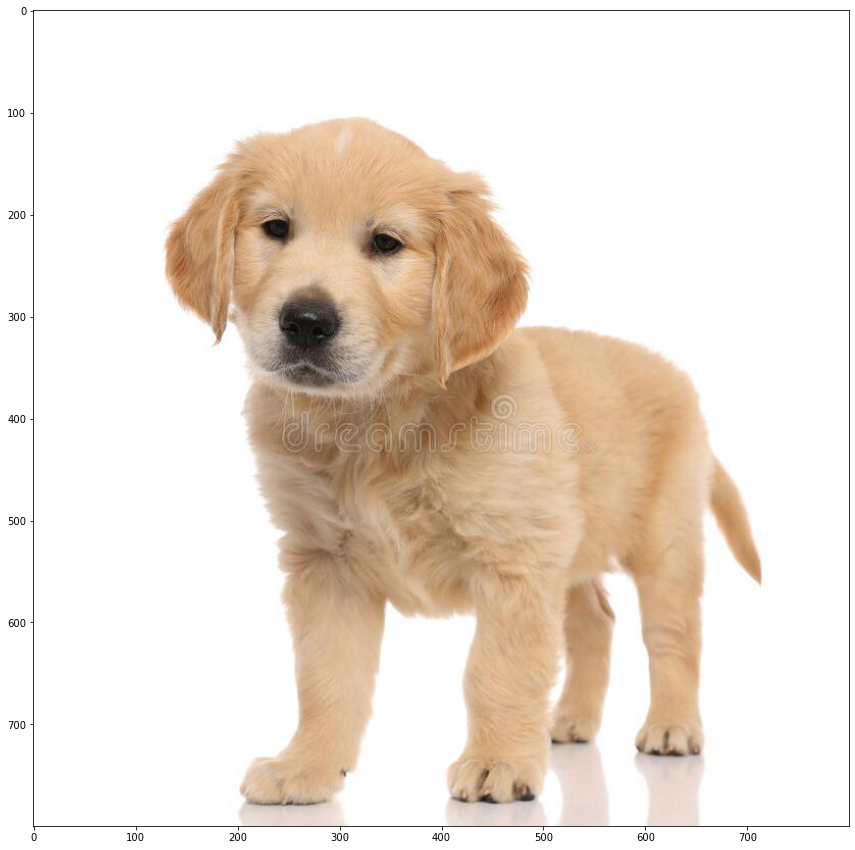

In [4]:
img = cv2.imread('/Users/szokirov/Downloads/little-golden-retriever-dog-standing-white-background-little-golden-retriever-dog-standing-white-background-looking-190302464.jpeg')
imshow(img)

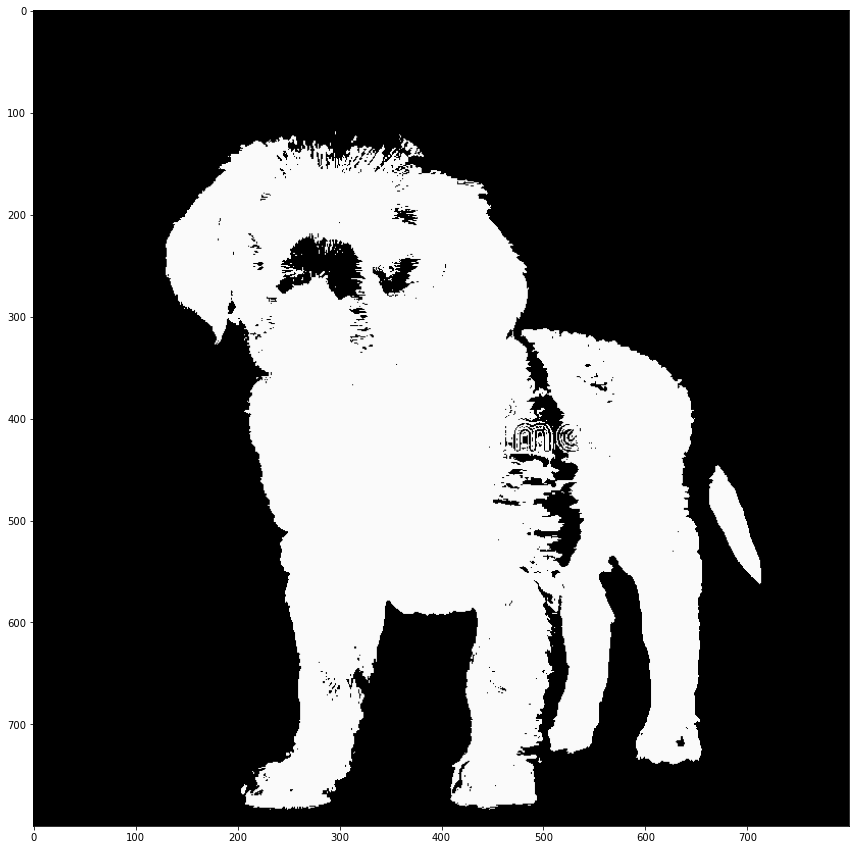

In [5]:
img_gray = cv2.imread('/Users/szokirov/Downloads/little-golden-retriever-dog-standing-white-background-little-golden-retriever-dog-standing-white-background-looking-190302464.jpeg', cv2.IMREAD_GRAYSCALE)
ret, threshold = cv2.threshold(img_gray, 200, 250, cv2.THRESH_BINARY_INV)
imshow(threshold)

In [6]:
contours, h = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key = cv2.contourArea, reverse=True)

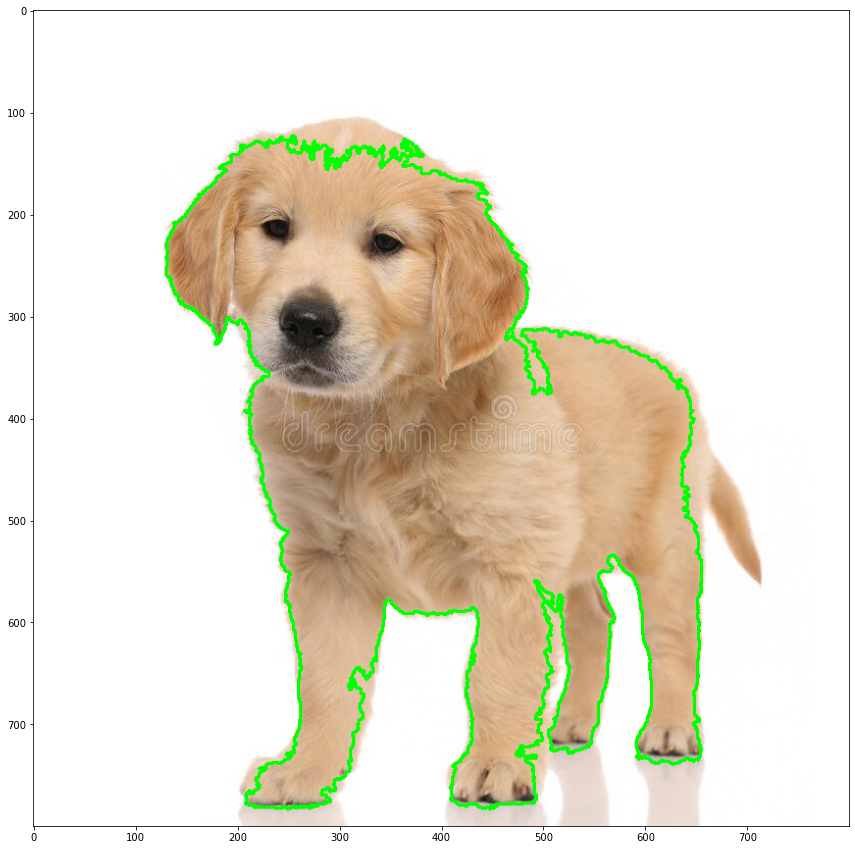

In [7]:
copy = img.copy()
cv2.drawContours(copy, sorted_contours, 0, (0, 255, 0), 2)
imshow(copy)


In [8]:
# bounding rectangle
x, y, w, h = cv2.boundingRect(sorted_contours[0])


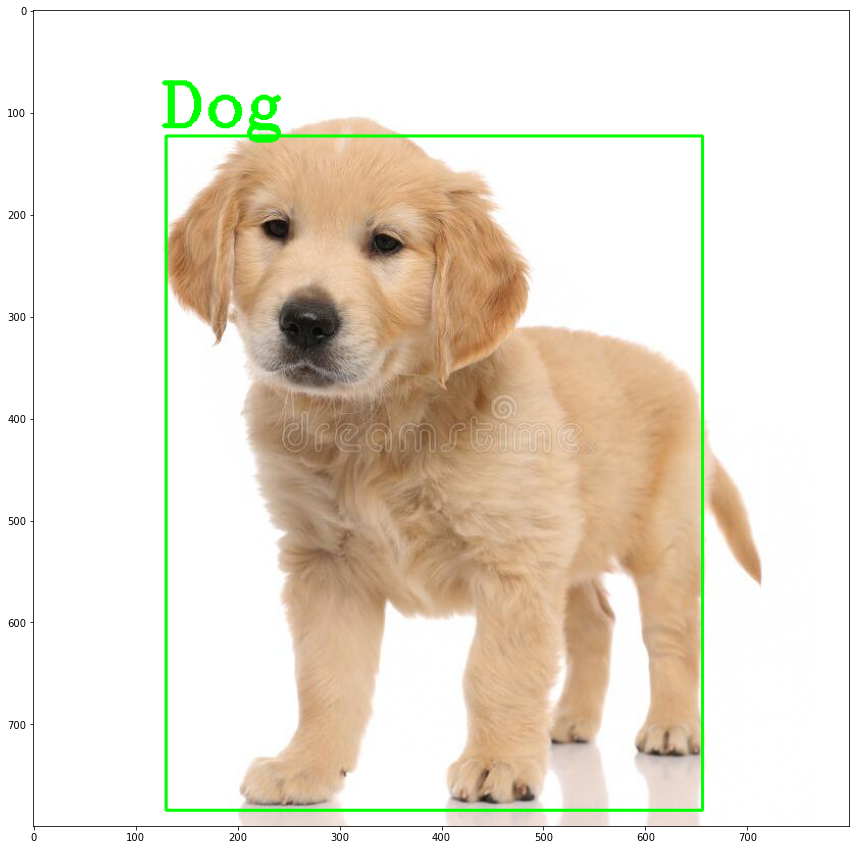

In [9]:
copy = img.copy()
cv2.rectangle(copy, (x,y), (x+w, y+h), (0, 255, 0), 2)
cv2.putText(copy, 'Dog', (x-6, y-10), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 4)
cv2.imwrite('dog.jpg', copy)
imshow(copy)

In [10]:
def annotate(image, text=str, path_to_save=str):
    img = cv2.imread(image)
    img_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    ret, threshold = cv2.threshold(img_gray, 200, 250, cv2.THRESH_BINARY_INV)
    contours, h = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contours = sorted(contours, key = cv2.contourArea, reverse=True)
    # bounding rectangle
    x, y, w, h = cv2.boundingRect(sorted_contours[0])
    copy = img.copy()
    cv2.rectangle(copy, (x,y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(copy, text, (x-6, y-10), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 4)
    cv2.imwrite(path_to_save, copy)
    imshow(copy)



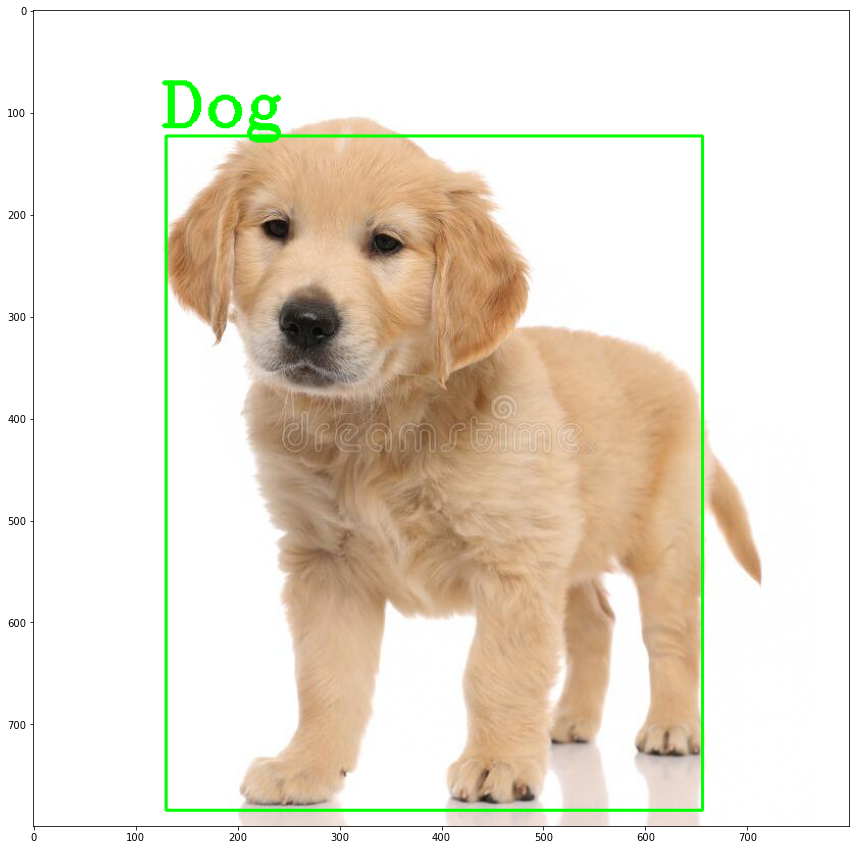

In [11]:
annotate('/Users/szokirov/Downloads/little-golden-retriever-dog-standing-white-background-little-golden-retriever-dog-standing-white-background-looking-190302464.jpeg', 
'Dog', 'dog.jpg')

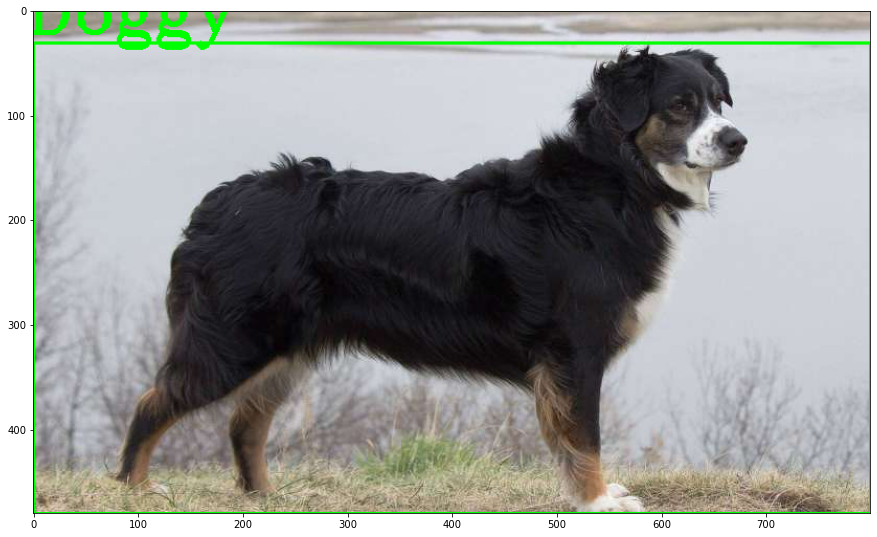

In [12]:
annotate('/Users/szokirov/Downloads/img/dog.1jpg.jpg', 'Doggy', 'doggy.png')